<a href="https://colab.research.google.com/github/Prakriti-Sahu/FoML/blob/main/ML_Assignment_3_Q5_Gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Question - Gradient Boosting**

**Importing data**

In [248]:
!wget https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/loan_train.csv
!wget https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/loan_test.csv

--2021-10-30 15:08:19--  https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/loan_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20707883 (20M) [text/plain]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  19.75M  --.-KB/s    in 0.1s    

2021-10-30 15:08:19 (153 MB/s) - ‘loan_train.csv’ saved [20707883/20707883]

--2021-10-30 15:08:19--  https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/loan_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12136187 (12M) [text/plain]
Sa

**Importing necessary libraries**

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Reading data**

In [250]:
train_data=pd.read_csv("loan_train.csv")
test_data=pd.read_csv("loan_test.csv")

**Checking datatype of the features**

In [251]:
n_object_features = (train_data.dtypes == "object").sum()
n_float_features = (train_data.dtypes == "float").sum()
n_int_features = (train_data.dtypes == "int").sum()
print(f"Number of samples: {train_data.shape[0]}")
print(f"Number of features: {train_data.shape[1]}")
print(f"Number of object features: {n_object_features}")
print(f"Number of float features: {n_float_features}")
print(f"Number of int features: {n_int_features}")

Number of samples: 24999
Number of features: 111
Number of object features: 24
Number of float features: 74
Number of int features: 13


**Data dimensions**

In [252]:
print("train data shape: {}".format(train_data.shape))
print("test data shape: {}".format(test_data.shape))

train data shape: (24999, 111)
test data shape: (14718, 111)


**Preprocessing data**

In [253]:
#train data
train_data1=train_data[train_data['loan_status']=='Fully Paid']
print(train_data1.shape)
train_data2=train_data[train_data['loan_status']=='Charged Off']
print(train_data2.shape)
train_data=train_data1.append(train_data2)
print("Train data dimensions:",train_data.shape)

#test data
test_data1=test_data[test_data['loan_status']=='Fully Paid']
print(test_data1.shape)
test_data2=test_data[test_data['loan_status']=='Charged Off']
print(test_data2.shape)
test_data=test_data1.append(test_data2)
print("Test Data Dimensions:",test_data.shape)

(20827, 111)
(3474, 111)
Train data dimensions: (24301, 111)
(12123, 111)
(2153, 111)
Test Data Dimensions: (14276, 111)


Getting rid of NaN values

In [254]:
def NaNcheck(data):
  columns=data.columns 
  nan_count=[]
  for i in columns:
    nan_count.append(data[i].isnull().sum())
  arr=np.array(nan_count)
  
  # values for columns with high NaN values
  index_values=np.where(arr>=400)
  print(index_values,np.count_nonzero(index_values))

  return index_values,arr

index_values,arr=NaNcheck(train_data)

columns=train_data.columns
columns_delete=columns[index_values]

# deleting columns with NaN columns
train_data=train_data.drop(columns_delete,axis=1)
print(f"Final train data: {train_data.shape}")

(array([ 19,  28,  29,  47,  50,  53,  54,  55,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 107, 108, 109, 110]),) 59
Final train data: (24301, 52)


In [255]:
train_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [256]:
train_data.head(8)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
1,476321,603324,15000,15000,14800.000000,36 months,8.94%,476.58,A,A5,1400,1 year,RENT,147000.0,Not Verified,10-Jan,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Green City,300xx,GA,3.47,0,Feb-97,0,6,0,4910,14%,17,f,0.0,0.0,15112.760000,14911.26,15000.0,112.76,0.0,0.0,0.0,10-Mar,15114.03,10-Feb,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,451484,556265,2000,2000,2000.000000,36 months,13.57%,67.94,C,C3,36000,4 years,OWN,36000.0,Not Verified,9-Oct,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,payoff w/in 2 years,310xx,GA,7.83,0,Mar-00,0,8,0,1790,34.40%,10,f,0.0,0.0,2354.966827,2354.97,2000.0,354.97,0.0,0.0,0.0,11-Dec,101.78,11-Dec,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,800018,1005270,14000,14000,14000.000000,60 months,17.49%,351.64,D,D5,old palm inc,5 years,MORTGAGE,50000.0,Not Verified,11-Jul,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,save %,334xx,FL,21.24,1,4-Jun,1,9,1,553,9.40%,27,f,0.0,0.0,20804.230020,20804.23,14000.0,6804.23,0.0,0.0,0.0,15-Sep,3943.27,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,471391,595223,12000,12000,11900.000000,36 months,8.94%,381.26,A,A5,Brocade Communications,7 years,MORTGAGE,294000.0,Not Verified,9-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Invest in Lending Club Notes,939xx,CA,0.50,0,Aug-93,0,11,0,5306,2.80%,21,f,0.0,0.0,12344.811770,12241.94,12000.0,344.81,0.0,0.0,0.0,10-May,11204.30,10-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0
6,521762,674784,10000,6525,6480.473624,60 months,7.88%,131.93,A,A5,CenturyLink,4 years,MORTGAGE,65000.0,Not Verified,10-Jun,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Discover,640xx,MO,7.62,1,Feb-96,1,13,0,5629,19.10%,23,f,0.0,0.0,7908.889997,7846.07,6525.0,1383.89,0.0,0.0,0.0,15-Feb,668.53,15-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0
7,664532,849696,7800,7800,7800.000000,60 months,14.91%,185.20,D,D2,Department of Homeland Security,4 years,MORTGAGE,94000.0,Verified,11-Feb,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Help With Divorce Expenses,480xx,MI,12.96,0,Feb-00,1,11,0,2317,37.40%,37,f,0.0,0.0,9864.289537,9864.29,7800.0,2064.29,0.0,0.0,0.0,13-May,58.59,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0
8,973622,1195649,18825,18825,18825.000000,36 months,7.90%,589.04,A,A4,"Down To Earth Distributors, Inc.",5 years,RENT,42000.0,Not Verified,11-Oct,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Consolidation Loan,974xx,OR,22.74,0,Aug-98,0,7,0,22121,55.40%,22,f,0.0,0.0,20958.528940,20958.53,18825.0,2133.53,0.0,0.0,0.0,13-Dec,239.16,13-Dec,0.0,1,INDIVIDUAL,0,0.0,0,0.0
10,453308,560296,2600,2600,2600.000000,36 months,12.53%,87.02,B,B5,"Plaid, Inc.",2 years,RENT,40792.0,Not Verified,9-Oct,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,New iMac for Work,068xx,CT,13.54,0,3-Nov,1,12,0,9847,24.10%,14,f,0.0,0.0,3132.393851,3132.39,2600.0,532.39,0.0,0.0,0.0,12-Nov,94.26,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0


Getting rid of unnecessary features

In [257]:
print("'chargeoff_within_12_mths'' has same value in all rows, i.e., ",train_data.chargeoff_within_12_mths.unique())
print("'collections_12_mths_ex_med' has same value in all rows, i.e., ",train_data.collections_12_mths_ex_med.unique())
print("'tax_liens' has same value in all rows, i.e., ",train_data.tax_liens.unique())
print("'pymnt_plan' has same value in all rows, i.e., ",train_data.pymnt_plan.unique())
print("Values in 'title' col seem unimportant")
print("'initial_list_status' has same value in all rows, i.e., ", train_data.initial_list_status.unique())
print("'out_prncp' has same value in all rows, i.e., ",train_data.out_prncp.unique())

'chargeoff_within_12_mths'' has same value in all rows, i.e.,  [ 0. nan]
'collections_12_mths_ex_med' has same value in all rows, i.e.,  [ 0. nan]
'tax_liens' has same value in all rows, i.e.,  [ 0. nan]
'pymnt_plan' has same value in all rows, i.e.,  ['n']
Values in 'title' col seem unimportant
'initial_list_status' has same value in all rows, i.e.,  ['f']
'out_prncp' has same value in all rows, i.e.,  [0.]


In [258]:
train_data[['collection_recovery_fee','total_rec_late_fee','recoveries','policy_code','acc_now_delinq','delinq_amnt','application_type','out_prncp_inv']].describe()

,collection_recovery_fee,total_rec_late_fee,recoveries,policy_code,acc_now_delinq,delinq_amnt,out_prncp_inv
count,24301.000000,24301.000000,24301.000000,24301.0,24301.0,24301.0,24301.0
mean,12.354023,1.358008,100.174160,1.0,0.0,0.0,0.0
std,139.801427,7.397470,719.351788,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
max,5602.720000,166.429711,29623.350000,1.0,0.0,0.0,0.0


In [259]:
# id, member_id, url, emp_title don't play a role in predicting loan status
# total_rec_late_fee, recoveries, collection_recovery_fee have more than 75% data as '0'
# all other columns have '0' values
train_data=train_data.drop(['id','member_id','url', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','pymnt_plan','title', 'initial_list_status','out_prncp', 'total_rec_late_fee','recoveries','collection_recovery_fee', 'policy_code','acc_now_delinq','delinq_amnt','application_type','out_prncp_inv'],axis=1)


In [260]:
print("Dimensions of train data:",train_data.shape)
print("Total null values:",train_data.isnull().sum().sum())

Dimensions of train data: (24301, 34)
Total null values: 120


In [261]:
train_data=train_data.fillna(method='ffill')
print("Total null values left:",train_data.isnull().sum().sum())

Total null values left: 0


Converting categorical data

In [262]:
n_object_features = (train_data.dtypes == "object").sum()
n_float_features = (train_data.dtypes == "float").sum()
n_int_features = (train_data.dtypes == "int").sum()
print(f"Number of samples: {train_data.shape[0]}")
print(f"Number of features: {train_data.shape[1]}")
print(f"Number of object features: {n_object_features}")
print(f"Number of float features: {n_float_features}")
print(f"Number of int features: {n_int_features}")

Number of samples: 24301
Number of features: 34
Number of object features: 17
Number of float features: 9
Number of int features: 8


In [263]:
dt=train_data
dt['emp_length'] = dt['emp_length'].astype('|S')
dt['revol_util'] = dt['revol_util'].astype('|S')
dt['last_pymnt_d'] = dt['last_pymnt_d'].astype('|S')
dt.drop(['emp_title'],axis=1,inplace=True)
dt['emp_length'].describe()

le = LabelEncoder()
dt.term = le.fit_transform(dt.term)

col=['int_rate','emp_length','grade','sub_grade','revol_util','last_pymnt_d','home_ownership','verification_status','issue_d','loan_status','purpose','zip_code','addr_state','earliest_cr_line','last_credit_pull_d']

for i in col:
  le=LabelEncoder()
  dt[i]=le.fit_transform(dt[i])

dt[col].head()

dt.head()

train_data=dt
columns=train_data.columns

In [264]:
train_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,15000,15000,14800.000000,0,340,476.58,0,4,0,3,147000.0,0,4,1,9,257,10,3.47,0,224,0,6,0,4910,71,17,15112.760000,14911.26,15000.0,112.76,7,15114.03,3
2,2000,2000,2000.000000,0,101,67.94,2,12,4,2,36000.0,0,53,1,6,267,10,7.83,0,322,0,8,0,1790,312,10,2354.966827,2354.97,2000.0,354.97,14,101.78,14
4,14000,14000,14000.000000,1,210,351.64,3,19,5,0,50000.0,0,17,1,2,289,9,21.24,1,42,1,9,1,553,952,27,20804.230020,20804.23,14000.0,6804.23,71,3943.27,76
5,12000,12000,11900.000000,0,340,381.26,0,4,7,0,294000.0,0,45,1,9,731,4,0.50,0,151,0,11,0,5306,142,21,12344.811770,12241.94,12000.0,344.81,8,11204.30,8
6,10000,6525,6480.473624,1,327,131.93,0,4,4,0,65000.0,0,6,1,1,510,24,7.62,1,223,1,13,0,5629,124,23,7908.889997,7846.07,6525.0,1383.89,63,668.53,71


In [265]:
test_data=test_data[columns]
test_data.head()

dt=test_data
dt['emp_length'] = dt['emp_length'].astype('|S')
dt['revol_util'] = dt['revol_util'].astype('|S')
dt['last_pymnt_d'] = dt['last_pymnt_d'].astype('|S')
dt['last_credit_pull_d'] = dt['last_credit_pull_d'].astype('|S')
dt['emp_length'].describe()

le = LabelEncoder()
dt.term = le.fit_transform(dt.term)

col=['int_rate','emp_length','grade','sub_grade','revol_util','last_pymnt_d','home_ownership','verification_status','issue_d','loan_status','purpose','zip_code','addr_state','earliest_cr_line','last_credit_pull_d']

for i in col:
  le=LabelEncoder()
  dt[i]=le.fit_transform(dt[i])

dt[col].head()
test_data=dt
dt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,4200,4200,4200.0,0,293,128.96,0,1,6,4,69000.0,0,21,1,0,122,36,11.08,0,10,0,10,0,4544,41,15,4642.374867,4642.37,4200.0,442.37,57,132.82,76
2,10000,10000,9975.0,0,325,317.72,0,4,4,0,75000.0,0,53,1,2,150,36,12.64,0,123,1,10,0,36161,436,45,10287.347790,10261.63,10000.0,287.35,3,9337.10,76
3,6000,6000,6000.0,1,182,147.48,3,17,1,4,60000.0,1,20,1,2,156,36,13.06,0,7,0,20,0,13961,599,24,8848.343924,8848.34,6000.0,2848.34,76,147.02,76
4,25000,25000,25000.0,0,151,869.21,3,16,4,4,135000.0,1,11,1,2,718,4,15.49,0,290,2,20,0,21090,541,44,31293.587380,31293.59,25000.0,6293.59,47,960.31,76
5,7100,7100,7100.0,0,154,247.07,2,13,1,0,40000.0,0,21,1,4,57,29,16.08,0,260,1,6,0,5367,621,11,8624.213305,8624.21,7100.0,1524.21,38,1745.70,76


Scaling featues

In [266]:
col=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d']
scaler=StandardScaler().fit(train_data[col])
scaler_2=StandardScaler().fit(test_data[col])

train_scaled_data=scaler.transform(train_data[col])
test_scaled_data=scaler_2.transform(test_data[col])

In [267]:
df=pd.DataFrame(train_scaled_data,columns=col)
df_2=pd.DataFrame(test_scaled_data,columns=col)
df['loan_status']=train_data['loan_status']
df_2['loan_status']=test_data['loan_status']
df.head()
train_data=df
test_data=df_2


In [268]:
train_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,loan_status
0,0.533425,0.592017,0.649534,-0.578792,1.395870,0.739463,-1.131416,-0.870383,-1.252149,0.968373,1.102861,-1.021445,-1.068965,1.546330,-0.528639,-0.807495,-1.478135,-0.293896,0.015260,-0.812518,-0.760985,-0.227236,-0.539037,-1.515797,-0.452426,0.358495,0.409539,0.756939,-0.850271,-1.850656,2.739168,-2.654786,0.0
1,-1.248489,-1.256565,-1.188177,-0.578792,-0.630814,-1.237268,0.310996,0.308383,-0.005259,0.277015,-0.482905,-1.021445,2.498572,0.655364,-0.489633,-0.807495,-0.822116,-0.293896,0.641114,-0.812518,-0.306323,-0.227236,-0.736488,-0.711125,-1.068404,-1.096101,-1.041708,-1.107801,-0.748881,-1.458127,-0.592609,-2.108413,1.0
2,0.396355,0.449818,0.534677,1.727738,0.293490,0.135086,1.032202,1.339803,0.306463,-1.105700,-0.282899,-1.021445,-0.122475,-0.532590,-0.403821,-0.875720,1.195592,1.727034,-1.147040,0.121052,-0.078992,4.027058,-0.814772,1.425761,0.427542,1.007415,1.090644,0.613497,1.950801,1.738177,0.259961,0.971142,1.0
3,0.122214,0.165421,0.233178,-0.578792,1.395870,0.278368,-1.131416,-0.870383,0.929908,-1.105700,3.202930,-1.021445,1.916117,1.546330,1.320237,-1.216846,-1.925010,-0.293896,-0.450937,-0.812518,0.375670,-0.227236,-0.513976,-1.278736,-0.100439,0.042904,0.101021,0.326614,-0.753134,-1.794580,1.871453,-2.406435,NaN
4,-0.151927,-0.613116,-0.544910,1.727738,1.285632,-0.927726,-1.131416,-0.870383,-0.005259,-1.105700,-0.068606,-1.021445,-0.923351,-0.829578,0.458208,0.147655,-0.853714,1.727034,0.008874,0.121052,0.830332,-0.227236,-0.493535,-1.338836,0.075555,-0.462863,-0.407050,-0.458728,-0.318172,1.289573,-0.466826,0.722791,1.0


In [269]:
test_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,loan_status
0,-0.906720,-0.903686,-0.833273,-0.557285,1.099635,-0.903454,-1.116055,-1.287793,0.409924,0.963950,0.037155,-1.045609,0.183995,-1.144670,-1.130942,1.015511,-0.321019,-0.304958,-1.381394,-0.815289,0.192405,-0.242776,-0.532792,-1.562176,-0.598662,-0.794727,-0.736201,-0.752496,-0.684052,0.945382,-0.574211,0.988847,1.0
1,-0.126755,-0.096633,-0.021998,-0.557285,1.383370,-0.012377,-1.116055,-0.842168,-0.143254,-1.113235,0.150573,-1.045609,2.593754,-0.573076,-1.016276,1.015511,-0.088814,-0.304958,-0.662583,0.117403,0.192405,-0.242776,1.446565,-0.214974,2.003619,-0.158542,-0.096231,0.067713,-0.748918,-2.044047,1.482548,0.988847,0.0
2,-0.664662,-0.653222,-0.580408,1.794414,0.115429,-0.816027,1.076432,1.088870,-0.973022,0.963950,-0.132971,0.113598,0.108690,-0.573076,-0.991704,1.015511,-0.026297,-0.304958,-1.400477,-0.815289,2.463406,-0.242776,0.056752,0.340961,0.182022,-0.320716,-0.257189,-0.497948,0.322691,1.997218,-0.571038,0.988847,1.0
3,1.890397,1.990572,2.088720,-0.557285,-0.159439,2.591036,1.076432,0.940329,-0.143254,0.963950,1.284748,0.113598,-0.569055,-0.573076,1.309813,-1.173741,0.335408,-0.304958,0.399730,1.050095,2.463406,-0.242776,0.503057,0.143144,1.916876,2.208848,2.299074,2.188943,1.764306,0.391784,-0.389303,0.988847,1.0
4,-0.516738,-0.500160,-0.425880,-0.557285,-0.132839,-0.345894,0.345603,0.494705,-0.973022,-1.113235,-0.511030,-1.045609,0.183995,-0.001481,-1.397132,0.536612,0.423229,-0.304958,0.208896,0.117403,-0.715995,-0.242776,-0.481269,0.415995,-0.945633,-0.345976,-0.282715,-0.342391,-0.231372,-0.106454,-0.213802,0.988847,1.0


In [270]:
print("Total Null Values in train data:",train_data.isnull().sum().sum())
train_data['loan_status'].isnull().sum()
print(train_data.shape)
print("Total Null Values in test data :",test_data.isnull().sum().sum())
test_data['loan_status'].isnull().sum()
print(test_data.shape)

Total Null Values in train data: 685
(24301, 33)
Total Null Values in test data : 442
(14276, 33)


In [271]:
train_data=train_data.fillna(method='ffill')
print("Total Null Values in train data:",train_data.isnull().sum().sum())

Total Null Values in train data: 0


In [272]:
train_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'loan_status'],
      dtype='object')

In [273]:
f=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d']

       
model=GradientBoostingClassifier(max_depth=8)
model.fit(train_data[f],train_data['loan_status'])
print(model.score(train_data[f],train_data['loan_status']))

0.8929262170281058


In [274]:
test_data=test_data.fillna(method='ffill')
print("Total Null Values in test data :",test_data.isnull().sum().sum())

Total Null Values in test data : 0


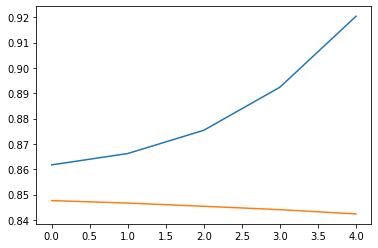

In [275]:
arr_1=[]
arr_2=[]
for i in range(5,10):
  model=GradientBoostingClassifier(max_depth=i)
  model.fit(train_data[col],train_data['loan_status'])
  arr_1.append(model.score(train_data[col],train_data['loan_status']))
  arr_2.append(model.score(test_data[col],test_data['loan_status']))

arr_11=np.array(arr_1)
arr_22=np.array(arr_2)

plt.plot(arr_11)
plt.plot(arr_22)

In [276]:
model=GradientBoostingClassifier(max_depth=8,min_samples_split=4)
model.fit(train_data[col],train_data['loan_status'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [277]:
model.score(train_data[col],train_data['loan_status'])

0.8933788732973952

In [278]:
model.score(test_data[col],test_data['loan_status'])

0.8454048753152144

**Selecting Features**

In [280]:
from sklearn.ensemble import RandomForestClassifier

X=train_data.iloc[:,:-2]
y=train_data.iloc[:,-1]

model=RandomForestClassifier()
model.fit(X,y)

print(f"Feature importance: {model.feature_importances_}")

df=pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Importance'])
df.head()

df=df.sort_values(by='Importance',ascending=False)

col=df.head(8).index.values

Feature importance: [0.02636653 0.02602531 0.035256   0.00350297 0.04109673 0.04242774
 0.01077013 0.02884633 0.02547002 0.00891147 0.04854377 0.01097944
 0.03751958 0.02233378 0.04763745 0.03206357 0.05270869 0.00682583
 0.04995117 0.01618608 0.03106091 0.00428657 0.05024786 0.0495947
 0.03936263 0.0414327  0.0419236  0.03069571 0.04650193 0.04114192
 0.05032889]


In [281]:
model=GradientBoostingClassifier(max_depth=6)
model.fit(train_data[col],train_data['loan_status'])

print("train data score:")
print(model.score(train_data[col],train_data['loan_status']))

print("\ntest data score:")
print(model.score(test_data[col],test_data['loan_status']))

train data score:
0.8642442697831365

test data score:
0.8454048753152144


In [282]:
from sklearn.metrics import classification_report,confusion_matrix

pred=model.predict(test_data[col])

print("Confusion matrix:")
print(confusion_matrix(test_data['loan_status'],pred))


print("Classification report:")
print(classification_report(test_data['loan_status'],pred))

Confusion matrix:
[[   17  2130]
 [   77 12052]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.18      0.01      0.02      2147
         1.0       0.85      0.99      0.92     12129

    accuracy                           0.85     14276
   macro avg       0.52      0.50      0.47     14276
weighted avg       0.75      0.85      0.78     14276



In [283]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data[col],train_data['loan_status'])

print("Test data score:")
print(clf.score(test_data[col],test_data['loan_status']))

print("Train data score:")
clf.score(train_data[col],train_data['loan_status'])

Test data score:
0.7125945643037266
Train data score:


1.0